In [1]:
import os
from astroquery.mast import Observations
from astroquery.mast import Catalogs

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import gridspec

In [3]:
targets_df = pd.read_csv('target_list.csv', header=None)

In [4]:
targets = np.squeeze(targets_df.values)

In [5]:
def split_line_by_n(line, n):
    return [line[i:i+n] for i in range(0, len(line), n)]

In [6]:
def get_url(name):
    begin = 'https://archive.stsci.edu/missions/tess/tid/'
    split_dash = name.split('-')
    mid1 = split_dash[1]
    mid2 = split_line_by_n(split_dash[2], 4)
    print(name)
    return begin + mid1 + '/' + mid2[0] + '/' + mid2[1] + '/' + mid2[2] + '/' + mid2[3] + '/' + name + '_lc.fits'

In [7]:
def get_LC(targets):
    """get .csv files with light curves"""
    not_processed = []
    for target in targets:
        object_info = Observations.query_object(target)
        mask_lc = (object_info['dataproduct_type'] == 'timeseries') & (object_info['obs_collection'] == 'TESS')
        try: 
            fits_file = get_url(object_info[mask_lc]['obs_id'].data[0])
            fits.info(fits_file)
        except:
            try:
                fits_file = get_url(object_info[mask_lc]['obs_id'].data[1])
                fits.info(fits_file)
            except:
                not_processed.append(target)
                print(f'!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!{target} LC was not found, process it manually')
        with fits.open(fits_file, mode="readonly") as hdulist:
            tess_bjds = hdulist[1].data['TIME']
            sap_fluxes = hdulist[1].data['SAP_FLUX']
            pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
            lc = pd.DataFrame(data={'time_tbjd':tess_bjds, 'sap_fluxes':sap_fluxes,'pdcsap_fluxes':pdcsap_fluxes})
            name = target.replace(' ', '_')
            lc.to_csv(f'{name}_LC.csv', sep=' ', index=False)
    return not_processed

In [8]:
def get_fitsfiles(targets):
    """get .fits files with light curves"""
    not_processed = []
    for target in targets:
        object_info = Observations.query_object(target)
        mask_lc = (object_info['dataproduct_type'] == 'timeseries') & (object_info['obs_collection'] == 'TESS')
        try: 
            fits_file = get_url(object_info[mask_lc]['obs_id'].data[0])
            fits.info(fits_file)
        except:
            try:
                fits_file = get_url(object_info[mask_lc]['obs_id'].data[1])
                fits.info(fits_file)
            except:
                not_processed.append(target)
                print(f'!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!{target} LC was not found, process it manually')
        data, hdr = fits.getdata(fits_file, 1, header=True)
        name = target.replace(' ', '_')
        fits.writeto(f'{name}_LC.fits', data, hdr)
    return not_processed

In [9]:
# TIC 307210830
# TIC 374829238
# TIC 219195044
# TIC 220479565

In [9]:
from astropy.io import fits
get_fitsfiles(targets)

tess2018206190142-s0001-s0013-0000000359271092-00226
tess2019058134432-s0009-0000000359271092-0139-s
Filename: /Users/olaboro/.astropy/cache/download/py3/024fd047fd27dae228425cf9fce1cd48
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18187R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 13)   int32   
tess2019058134432-s0009-0000000034068865-0139-s
Filename: /Users/olaboro/.astropy/cache/download/py3/5d6ddfb953a161df29d4826bd10c4686
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18187R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 13)   int32   
tess2018263035959-s0003-0000000037749396-0123-s
Filename: /Users/olaboro/.astropy/cache

tess2018234235059-s0002-0000000251848941-0121-s
Filename: /Users/olaboro/.astropy/cache/download/py3/7030ff52a2d6ebc1e723bc78b464c74f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   19737R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
tess2018206190142-s0001-s0006-0000000122613513-00196
tess2018263035959-s0003-0000000122613513-0123-s
Filename: /Users/olaboro/.astropy/cache/download/py3/3e181f0c37e0987d813683a0e604df45
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   19692R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
tess2018206045859-s0001-0000000260004324-0120-s
Filename: /Users/olaboro/.astropy/cache

tess2019058134432-s0009-0000000036724087-0139-s
Filename: /Users/olaboro/.astropy/cache/download/py3/b6db36eeeda09def1dd95c9d1982c6d7
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18187R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
tess2019058134432-s0009-0000000036734222-0139-s
Filename: /Users/olaboro/.astropy/cache/download/py3/7c75107606399c707b57b0c0c110b4a5
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18187R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
tess2019169103026-s0013-0000000351601843-0146-s
Filename: /Users/olaboro/.astropy/cache/download/py3/c83147437e7b0d3d11f8863a3cbfb583
No.   

tess2018263035959-s0003-0000000092226327-0123-s
Filename: /Users/olaboro/.astropy/cache/download/py3/86a1548fc522aeb73827d597904400af
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   19692R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 12)   int32   
tess2018206045859-s0001-0000000237914496-0120-s
Filename: /Users/olaboro/.astropy/cache/download/py3/a0c2690d209df8ffc8198a8dc5b5940e
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   20076R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
tess2018206190142-s0001-s0013-0000000261108236-00226
tess2019140104343-s0012-0000000261108236-0144-s
Filename: /Users/olaboro/.astropy/cache

tess2018349182459-s0006-0000000144700903-0126-s
Filename: /Users/olaboro/.astropy/cache/download/py3/0d9f075b64b0b45c052723853b639de3
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   15678R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
tess2018206190142-s0001-s0013-0000000073649615-00226
tess2019085135100-s0010-0000000073649615-0140-s
Filename: /Users/olaboro/.astropy/cache/download/py3/817f37a28ab05a5bfb5973794d69cafb
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18900R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
tess2018234235059-s0002-0000000229112415-0121-s
Filename: /Users/olaboro/.astropy/cache

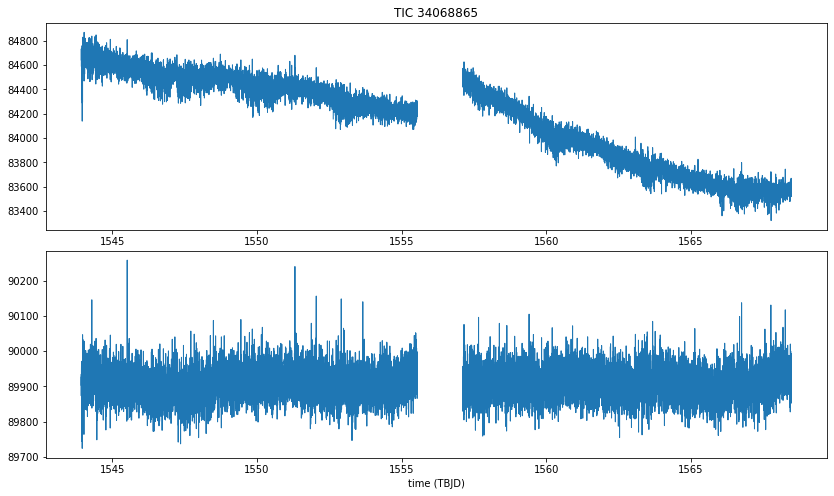

In [51]:
fig = plt.figure(figsize=(14, 8))
plt.subplots_adjust(hspace = 0.1)

spec = gridspec.GridSpec(ncols=1, nrows=2)

ax = fig.add_subplot(spec[0])
ax.plot(tess_bjds, sap_fluxes, lw=1)
plt.title(f'{target}')

ax = fig.add_subplot(spec[1])
ax.plot(tess_bjds, pdcsap_fluxes, lw=1)
ax.set_xlabel('time (TBJD)')

plt.savefig(f'lc.png', bbox_inches = 'tight')